In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
queries = ['q11', 'q12', 'q13', 'q21', 'q22', 'q23', 'q31', 'q32', 'q33', 'q34', 'q41', 'q42', 'q43']

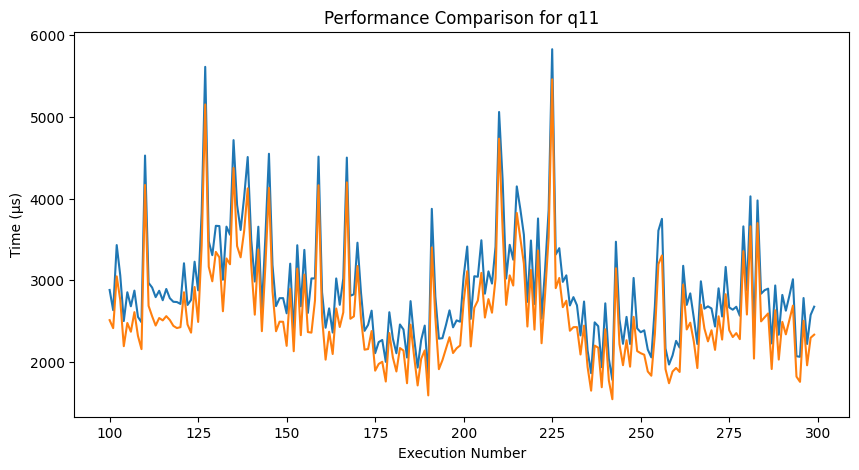

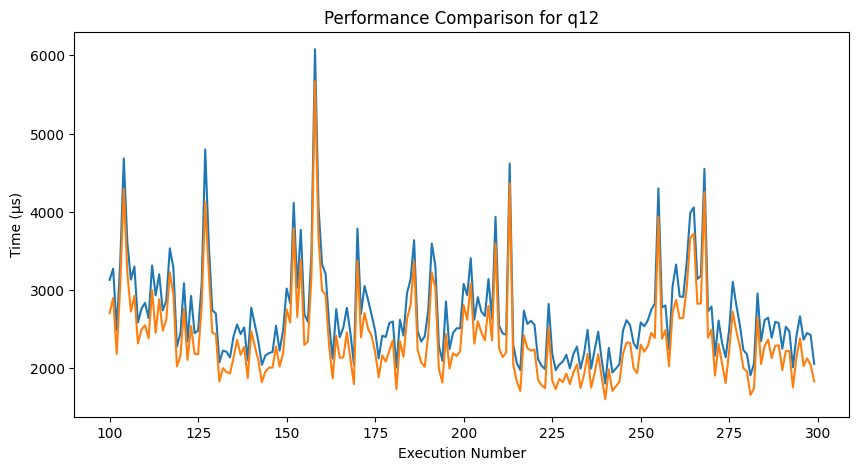

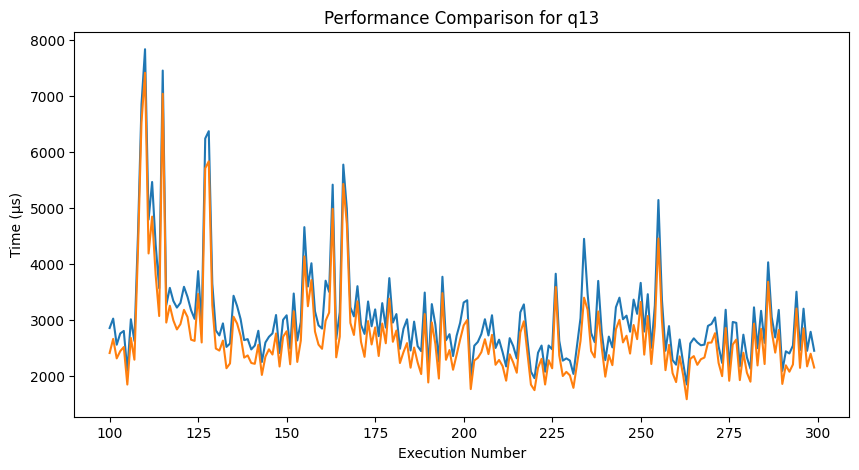

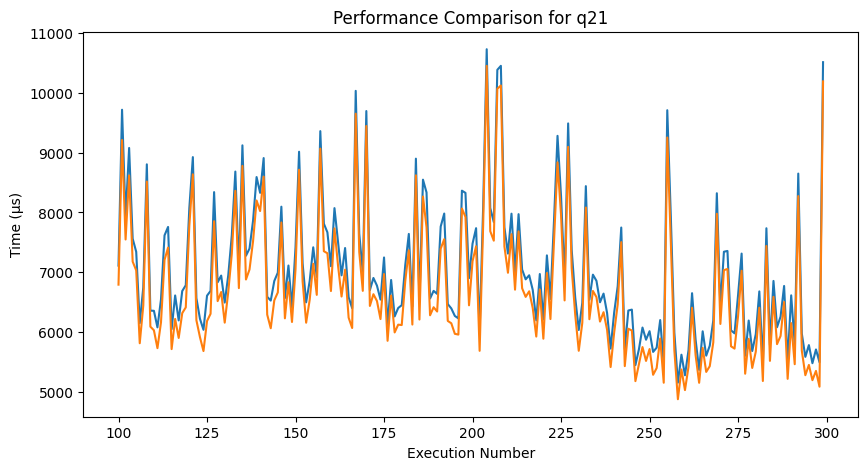

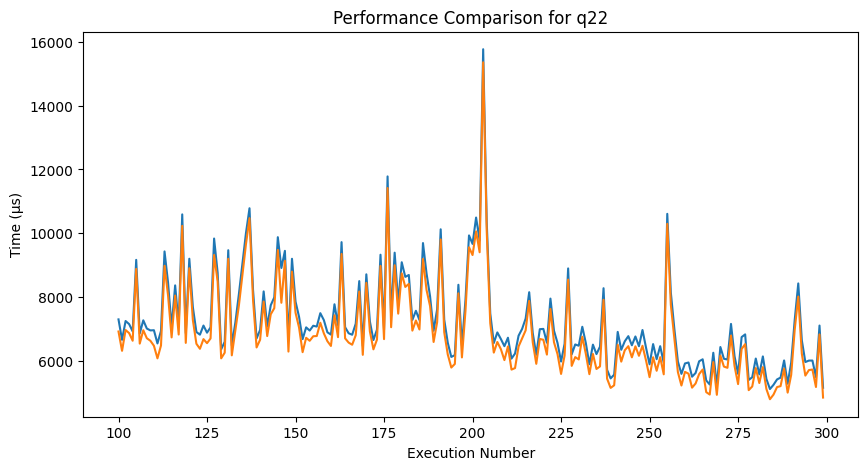

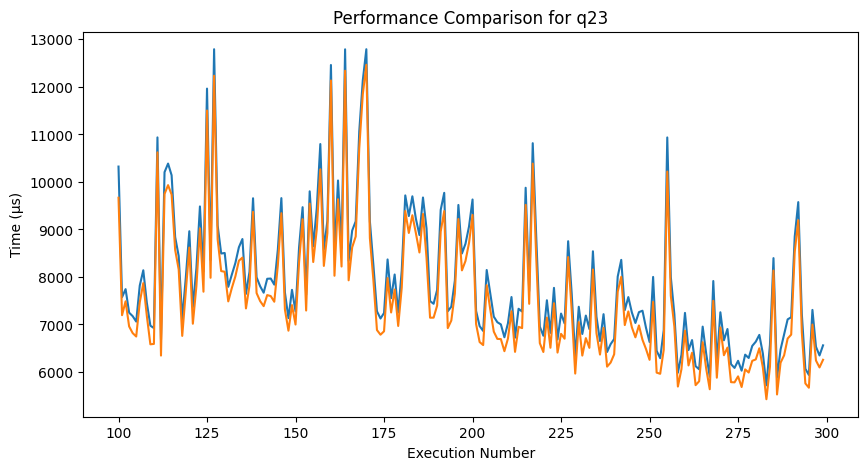

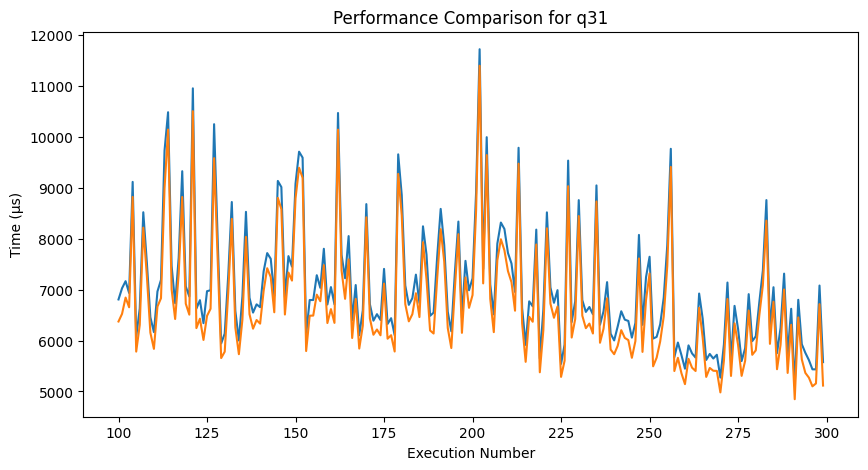

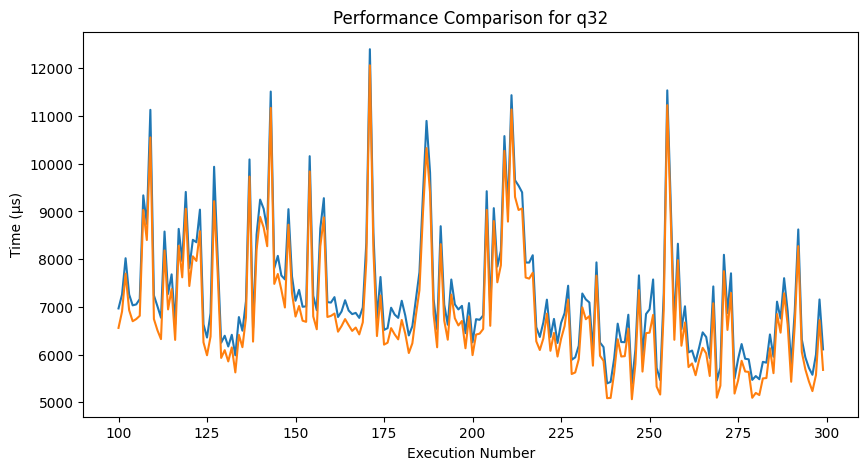

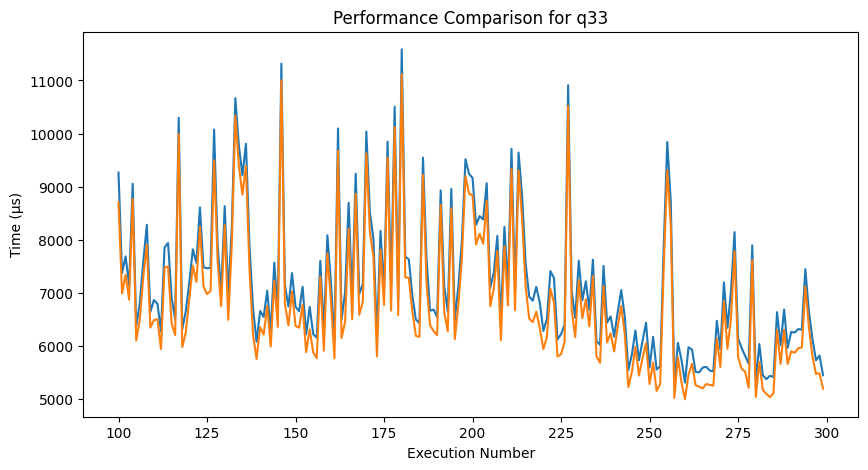

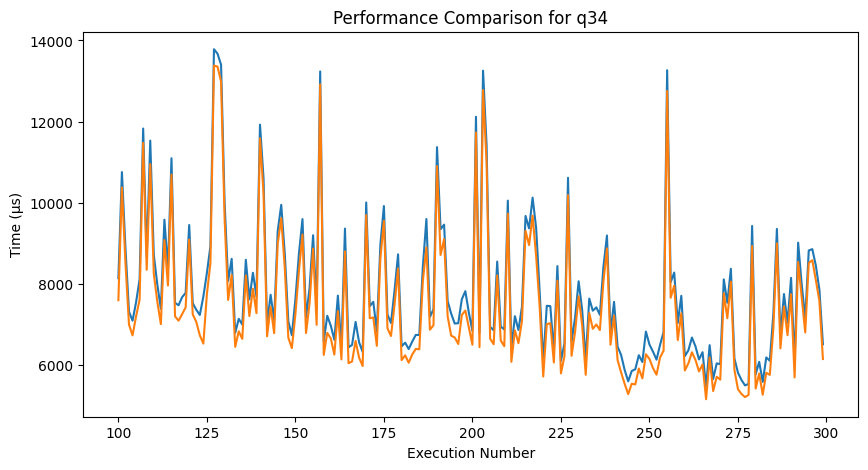

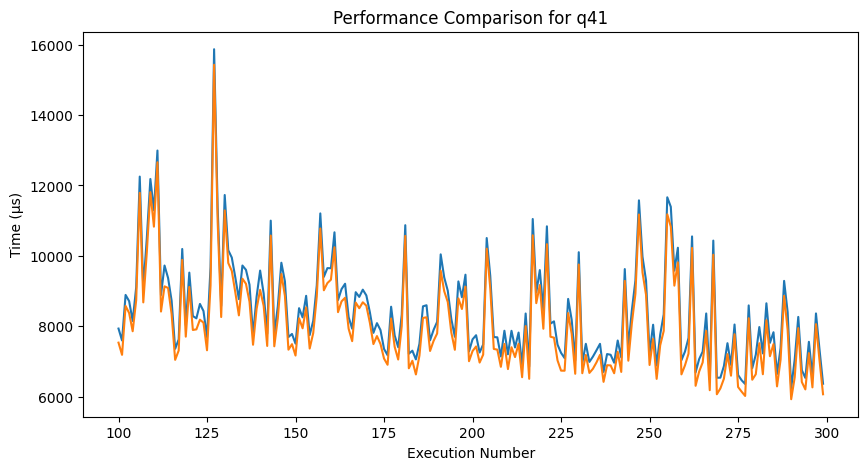

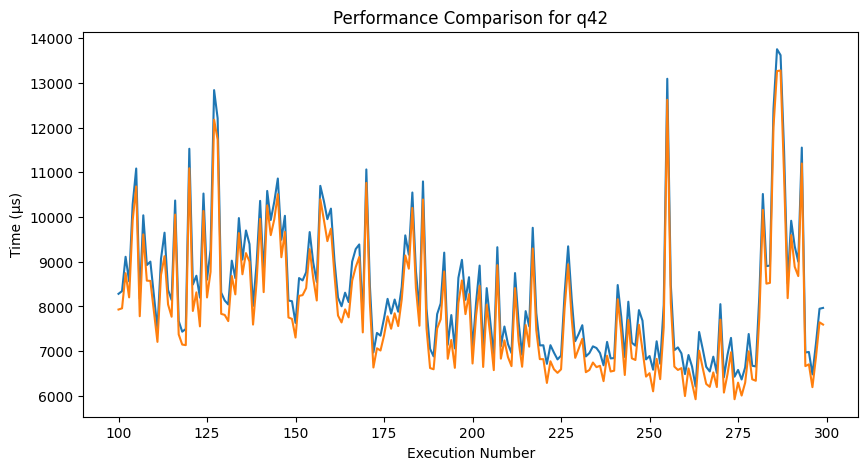

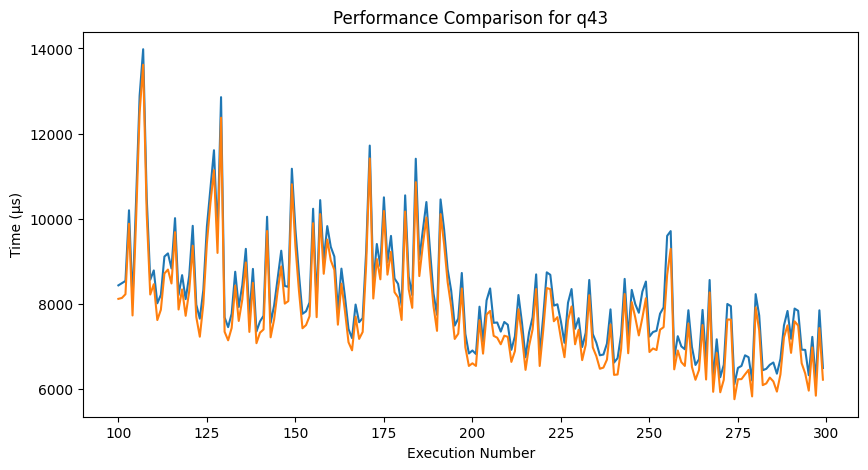

In [3]:
for q in queries:
    c_time = pd.read_csv(f'./{q}.txt', header=None, names=['time'])
    java_time = pd.read_csv(f'./{q}-calcite.txt', header=None, names=['time'])

    plt.figure(figsize=(10, 5))
    plt.plot(c_time['time'][100:300], label='C++ Executor')
    plt.plot(java_time['time'][100:300], label='Java Executor')
    plt.title(f'Performance Comparison for {q}')
    plt.xlabel('Execution Number')
    plt.ylabel('Time (µs)')

In [ ]:
results = []

for q in queries:
    c_time = pd.read_csv(f'./{q}.txt', header=None, names=['time'])
    java_time = pd.read_csv(f'./{q}-calcite.txt', header=None, names=['time'])

    # ignore first 100 measurements for warm-up
    c_time = c_time[100:]
    java_time = java_time[100:]

    c_mean = c_time['time'].mean()
    c_std = c_time['time'].std()
    java_mean = java_time['time'].mean()
    java_std = java_time['time'].std()

    thrift_times = c_time['time'] - java_time['time']
    thrift_mean = thrift_times.mean()
    thrift_std = thrift_times.std()

    print(f'{q}: C++: {c_mean:.2f} ± {c_std:.2f} µs, Java: {java_mean:.2f} ± {java_std:.2f} µs, Thrift: {thrift_mean:.2f} ± {thrift_std:.2f} µs')

    results.append({
        'Query': q,
        'C++ Mean': c_mean,
        'C++ Std': c_std,
        'Java Mean': java_mean,
        'Java Std': java_std,
        'Thrift Mean': thrift_mean,
        'Thrift Std': thrift_std
    })

df = pd.DataFrame(results)
df.to_csv('performance_results.csv', index=False)

q11: C++: 2101.05 ± 720.00 µs, Java: 1846.17 ± 678.84 µs, Thrift: 254.88 ± 64.47 µs
q12: C++: 2115.64 ± 672.22 µs, Java: 1862.90 ± 624.41 µs, Thrift: 252.74 ± 96.05 µs
q13: C++: 2233.59 ± 800.96 µs, Java: 1960.50 ± 752.77 µs, Thrift: 273.10 ± 95.67 µs
q21: C++: 5287.02 ± 1998.74 µs, Java: 5006.40 ± 1939.43 µs, Thrift: 280.62 ± 189.32 µs
q22: C++: 5315.27 ± 1433.88 µs, Java: 5025.83 ± 1398.43 µs, Thrift: 289.44 ± 72.08 µs
q23: C++: 5607.15 ± 1622.75 µs, Java: 5327.47 ± 1581.52 µs, Thrift: 279.68 ± 70.01 µs
q31: C++: 5339.14 ± 1368.89 µs, Java: 5053.37 ± 1334.06 µs, Thrift: 285.77 ± 70.38 µs
q32: C++: 5222.80 ± 1507.45 µs, Java: 4931.40 ± 1473.49 µs, Thrift: 291.40 ± 68.01 µs
q33: C++: 5364.70 ± 1343.91 µs, Java: 5066.47 ± 1310.99 µs, Thrift: 298.24 ± 68.95 µs
q34: C++: 5496.38 ± 1700.00 µs, Java: 5195.44 ± 1659.51 µs, Thrift: 300.93 ± 79.15 µs
q41: C++: 6395.67 ± 1625.74 µs, Java: 6077.87 ± 1592.04 µs, Thrift: 317.80 ± 76.33 µs
q42: C++: 6338.08 ± 1468.31 µs, Java: 6025.91 ± 1434.14 µs,